<a href="https://colab.research.google.com/github/pn0159/prathima_INFO5731_Fall2020/blob/master/Prathima_In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk
nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 1.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=dd25cf2fe45bba6b125bd8136ca1a0042f6b9d50ccc05780f28a2d06d0b4bac9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [98]:
titles = open("/content/sample_data/sample1_exercise.txt").read()
titles

'Title\nData analysis in community and landscape ecology\nPaleontological data analysis\nMethods and data analysis of comparative research.\nData analysis: A model comparison approach\nLongitudinal data analysis for discrete and continuous outcomes\nCategorical data analysis using SAS\nData analysis using regression and multilevel/hierarchical models\nOptimized monte carlo data analysis\nggplot2: elegant graphics for data analysis\nData analysis: a Bayesian tutorial\nQualitative data analysis with ATLAS. ti\nApplied survey data analysis\nStatistical methods for spatial data analysis\nHierarchical linear models: Applications and data analysis methods.\nSpatial data analysis: theory and practice\nDealing with data: Using NVivo in the qualitative data analysis process\nGeophysical data analysis: Discrete inverse theory\nMultivariate data analysis: in practice: an introduction to multivariate data analysis and experimental design\nLongitudinal data analysis\nExperimental design and data an

In [ ]:
# Import Dataset
df = pd.read_csv('/content/sample_data/sample_exercise.csv')
df.head(100)

,Title
0,Data analysis in community and landscape ecology
1,Paleontological data analysis
2,Methods and data analysis of comparative resea...
3,Data analysis: A model comparison approach
4,Longitudinal data analysis for discrete and co...
...,...
95,Data analysis in qualitative research
96,Data analysis for scientists and engineers
97,Data analysis in social psychology
98,Data analysis & statistics for nursing research


In [102]:
# Convert to list
data = df.Title.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', i) for i in data]

print(data)

['Data analysis in community and landscape ecology', 'Paleontological data analysis', 'Methods and data analysis of comparative research.', 'Data analysis: A model comparison approach', 'Longitudinal data analysis for discrete and continuous outcomes', 'Categorical data analysis using SAS', 'Data analysis using regression and multilevel/hierarchical models', 'Optimized monte carlo data analysis', 'ggplot2: elegant graphics for data analysis', 'Data analysis: a Bayesian tutorial', 'Qualitative data analysis with ATLAS. ti', 'Applied survey data analysis', 'Statistical methods for spatial data analysis', 'Hierarchical linear models: Applications and data analysis methods.', 'Spatial data analysis: theory and practice', 'Dealing with data: Using NVivo in the qualitative data analysis process', 'Geophysical data analysis: Discrete inverse theory', 'Multivariate data analysis: in practice: an introduction to multivariate data analysis and', 'Longitudinal data analysis', 'Experimental design

In [103]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words)

[['data', 'analysis', 'in', 'community', 'and', 'landscape', 'ecology'], ['paleontological', 'data', 'analysis'], ['methods', 'and', 'data', 'analysis', 'of', 'comparative', 'research'], ['data', 'analysis', 'model', 'comparison', 'approach'], ['longitudinal', 'data', 'analysis', 'for', 'discrete', 'and', 'continuous', 'outcomes'], ['categorical', 'data', 'analysis', 'using', 'sas'], ['data', 'analysis', 'using', 'regression', 'and', 'multilevel', 'hierarchical', 'models'], ['optimized', 'monte', 'carlo', 'data', 'analysis'], ['ggplot', 'elegant', 'graphics', 'for', 'data', 'analysis'], ['data', 'analysis', 'bayesian', 'tutorial'], ['qualitative', 'data', 'analysis', 'with', 'atlas', 'ti'], ['applied', 'survey', 'data', 'analysis'], ['statistical', 'methods', 'for', 'spatial', 'data', 'analysis'], ['hierarchical', 'linear', 'models', 'applications', 'and', 'data', 'analysis', 'methods'], ['spatial', 'data', 'analysis', 'theory', 'and', 'practice'], ['dealing', 'with', 'data', 'using', 

In [104]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['data', 'analysis', 'in', 'community', 'and', 'landscape', 'ecology']


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [105]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [106]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized)

[['landscape', 'ecology'], ['paleontological', 'analysis'], ['method'], ['comparison', 'approach'], ['longitudinal', 'analysis', 'discrete', 'continuous', 'outcome'], ['categorical', 'analysis', 'use'], ['datum', 'analysis', 'use', 'regression', 'multilevel', 'hierarchical', 'model'], ['optimize', 'analysis'], ['elegant', 'graphic', 'data', 'analysis'], ['tutorial'], ['qualitative', 'analysis'], ['analysis'], ['statistical', 'method', 'spatial', 'datum', 'analysis'], ['analysis', 'method'], ['spatial', 'theory', 'practice'], ['deal', 'use', 'analysis', 'process'], ['geophysical', 'discrete', 'inverse', 'theory'], ['analysis', 'practice', 'introduction', 'multivariate', 'datum', 'analysis'], ['longitudinal', 'analysis'], ['analysis', 'biologist'], ['datum'], ['graphical', 'analysis'], ['analysis', 'social', 'scientist'], ['introduction', 'geological', 'datum', 'analysis'], ['analysis'], ['absorption', 'spectroscopy', 'use', 'ifeffit'], ['analysis'], ['analysis'], ['analysis'], ['analysi

In [107]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1)], [(2, 1), (3, 1)], [(4, 1)], [(5, 1), (6, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (11, 1), (12, 1)], [(2, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(2, 1), (18, 1)], [(2, 1), (19, 1), (20, 1), (21, 1)], [(22, 1)], [(2, 1), (23, 1)], [(2, 1)], [(2, 1), (4, 1), (13, 1), (24, 1), (25, 1)], [(2, 1), (4, 1)], [(24, 1), (26, 1), (27, 1)], [(2, 1), (12, 1), (28, 1), (29, 1)], [(8, 1), (27, 1), (30, 1), (31, 1)], [(2, 2), (13, 1), (26, 1), (32, 1), (33, 1)], [(2, 1), (9, 1)], [(2, 1), (34, 1)], [(13, 1)], [(2, 1), (35, 1)], [(2, 1), (36, 1), (37, 1)], [(2, 1), (13, 1), (32, 1), (38, 1)], [(2, 1)], [(12, 1), (39, 1), (40, 1), (41, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(2, 1)], [(2, 1), (9, 1), (13, 1), (15, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(13, 1), (46, 1), (47, 1), (48, 1)], [(2, 1), (13, 1), (24, 1)], [(5, 1), (49, 1)], [(2, 1), (12, 1), (19, 1), (50, 1), (51, 1), (52, 1)], [(2, 1), (4, 1)], [(5, 1)], [(13, 1), (53, 1)], [(2, 1), (4,

In [108]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('ecology', 1), ('landscape', 1)],
 [('analysis', 1), ('paleontological', 1)],
 [('method', 1)],
 [('approach', 1), ('comparison', 1)],
 [('analysis', 1),
  ('continuous', 1),
  ('discrete', 1),
  ('longitudinal', 1),
  ('outcome', 1)],
 [('analysis', 1), ('categorical', 1), ('use', 1)],
 [('analysis', 1),
  ('use', 1),
  ('datum', 1),
  ('hierarchical', 1),
  ('model', 1),
  ('multilevel', 1),
  ('regression', 1)],
 [('analysis', 1), ('optimize', 1)],
 [('analysis', 1), ('data', 1), ('elegant', 1), ('graphic', 1)],
 [('tutorial', 1)],
 [('analysis', 1), ('qualitative', 1)],
 [('analysis', 1)],
 [('analysis', 1),
  ('method', 1),
  ('datum', 1),
  ('spatial', 1),
  ('statistical', 1)],
 [('analysis', 1), ('method', 1)],
 [('spatial', 1), ('practice', 1), ('theory', 1)],
 [('analysis', 1), ('use', 1), ('deal', 1), ('process', 1)],
 [('discrete', 1), ('theory', 1), ('geophysical', 1), ('inverse', 1)],
 [('analysis', 2),
  ('datum', 1),
  ('practice', 1),
  ('introduction', 1),
  ('mult

In [109]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [110]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.315*"analysis" + 0.100*"datum" + 0.070*"use" + 0.067*"method" + '
  '0.031*"model" + 0.030*"spatial" + 0.021*"data" + 0.021*"genetic" + '
  '0.021*"hierarchical" + 0.021*"multilevel"'),
 (1,
  '0.120*"method" + 0.063*"dual" + 0.063*"scaling" + 0.063*"application" + '
  '0.063*"measurement" + 0.063*"procedure" + 0.063*"nursing" + '
  '0.006*"analysis" + 0.006*"datum" + 0.006*"qualitative"'),
 (2,
  '0.145*"analysis" + 0.109*"data" + 0.056*"approach" + 0.056*"comparison" + '
  '0.056*"statistical" + 0.056*"elegant" + 0.056*"graphic" + '
  '0.038*"introduction" + 0.038*"qualitative" + 0.030*"datum"'),
 (3,
  '0.157*"datum" + 0.156*"analysis" + 0.118*"introduction" + '
  '0.069*"multivariate" + 0.069*"practice" + 0.036*"oceanography" + '
  '0.036*"physical" + 0.036*"system" + 0.036*"method" + 0.003*"geological"'),
 (4,
  '0.168*"analysis" + 0.107*"qualitative" + 0.069*"paleontological" + '
  '0.047*"tutorial" + 0.047*"geophysical" + 0.047*"inverse" + 0.047*"theory" + '
  '0.047*"

In [112]:
# Compute Perplexity
print('\nMeasure of Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nMeasure of Coherence Score: ', coherence_lda)


Measure of Perplexity:  -4.765629994640783

Measure of Coherence Score:  0.6237472979824557


In [113]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.149655 -0.086483       1        1  29.778734
9     -0.120226 -0.036714       2        1  15.738589
4     -0.025084  0.186053       3        1  11.781358
6     -0.065124  0.066106       4        1  11.722253
2     -0.017763  0.027038       5        1   9.496447
3     -0.051636 -0.083081       6        1   7.866565
7      0.059788 -0.020196       7        1   4.437837
5      0.074211  0.014963       8        1   4.158759
1      0.173537 -0.074493       9        1   3.468919
8      0.121953  0.006806      10        1   1.550539, topic_info=            Term       Freq      Total Category  logprob  loglift
13         datum  15.000000  15.000000  Default  30.0000  30.0000
4         method   9.000000   9.000000  Default  29.0000  29.0000
5       approach   3.000000   3.000000  Default  28.0000  28.0000
9   longitudinal   6.000000   6.000000  Default  27.0000  27.0000
32  introduction   4.000000   4.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
21       graphic   0.042346   2.143081  Topic10  -4.6548   0.2424
6     comparison   0.042346   2.142024  Topic10  -4.6548   0.2429
56       applied   0.042346   1.534663  Topic10  -4.6548   0.5764
36     scientist   0.042346   2.380667  Topic10  -4.6548   0.1373
49     practical   0.042346   2.099688  Topic10  -4.6548   0.2629

[493 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
39        1  0.651609     absorption
2         1  0.443460       analysis
2         2  0.180669       analysis
2         3  0.098547       analysis
2         4  0.131396       analysis
...     ...       ...            ...
65        4  0.691359  triangulation
22        3  0.906099       tutorial
87        4  0.691359     understand
12        1  0.733327            use
12        2  0.244442            use

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 5, 7, 3, 4, 8, 6, 2, 9])

In [116]:
!wget "http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip"
!unzip "/content/mallet-2.0.8.zip"

y
--2020-10-23 02:23:19--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.2’

mallet-2.0.8.zip.2  100%[===================>]  15.43M  5.81MB/s    in 2.7s    

2020-10-23 02:23:22 (5.81 MB/s) - ‘mallet-2.0.8.zip.2’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  

In [117]:

mallet_path = '/content/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [118]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nThe Measure of coherence: ', coherence_ldamallet)

[(5,
  [('data', 0.4),
   ('robust', 0.1),
   ('interactive', 0.1),
   ('optimize', 0.1),
   ('tool', 0.1),
   ('object', 0.1),
   ('system', 0.1),
   ('triangulation', 0.0),
   ('metabolomic', 0.0),
   ('metaboanalyst', 0.0)]),
 (15,
  [('method', 0.6666666666666666),
   ('multilevel', 0.05555555555555555),
   ('practical', 0.05555555555555555),
   ('measurement', 0.05555555555555555),
   ('strategy', 0.05555555555555555),
   ('occurrence', 0.05555555555555555),
   ('ecology', 0.05555555555555555),
   ('framework', 0.0),
   ('tool', 0.0),
   ('behavioral', 0.0)]),
 (0,
  [('data', 0.16666666666666666),
   ('approach', 0.16666666666666666),
   ('tutorial', 0.08333333333333333),
   ('qualitative', 0.08333333333333333),
   ('elegant', 0.08333333333333333),
   ('orient', 0.08333333333333333),
   ('physical', 0.08333333333333333),
   ('spatial', 0.08333333333333333),
   ('inverse', 0.08333333333333333),
   ('miss', 0.08333333333333333)]),
 (14,
  [('analysis', 0.6428571428571429),
   ('com

In [119]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

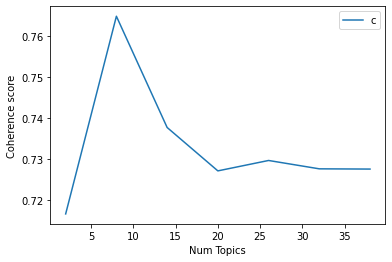

In [124]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [125]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

Num Topics = 2  has Coherence Value of 0.72
Num Topics = 8  has Coherence Value of 0.76
Num Topics = 14  has Coherence Value of 0.74
Num Topics = 20  has Coherence Value of 0.73
Num Topics = 26  has Coherence Value of 0.73
Num Topics = 32  has Coherence Value of 0.73
Num Topics = 38  has Coherence Value of 0.73


In [126]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.500*"analysis" + 0.167*"inverse" + 0.167*"graphic" + '
  '0.167*"computational" + 0.000*"physical" + 0.000*"tool" + '
  '0.000*"triangulation" + 0.000*"oceanography" + 0.000*"dyadic" + '
  '0.000*"framework"'),
 (1,
  '0.667*"analysis" + 0.067*"graphical" + 0.067*"nursing" + 0.067*"regression" '
  '+ 0.067*"geophysical" + 0.067*"miss" + 0.000*"triangulation" + 0.000*"tool" '
  '+ 0.000*"physical" + 0.000*"research"'),
 (2,
  '0.529*"analysis" + 0.118*"datum" + 0.059*"understand" + 0.059*"geology" + '
  '0.059*"scientist" + 0.059*"strategy" + 0.059*"outcome" + 0.059*"practice" + '
  '0.000*"object" + 0.000*"framework"'),
 (3,
  '0.625*"introduction" + 0.125*"geophysical" + 0.125*"system" + '
  '0.125*"ecology" + 0.000*"tool" + 0.000*"triangulation" + 0.000*"dyadic" + '
  '0.000*"object" + 0.000*"framework" + 0.000*"oceanography"'),
 (4,
  '0.357*"statistical" + 0.214*"datum" + 0.071*"practical" + 0.071*"scientist" '
  '+ 0.071*"exploratory" + 0.071*"social" + 0.071*"landscape"

In [127]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,2), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
                                                  
                                                  
                                                  
                                                  

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Text']

# Show
df_dominant_topic.head(100)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.06,"introduction, geophysical, system, ecology, to...",Data analysis in community and landscape ecology
1,1,12.0,0.06,"analysis, apply, population, ecology, deal, pa...",Paleontological data analysis
2,2,9.0,0.06,"method, approach, seismic, multivariate, appli...",Methods and data analysis of comparative resea...
3,3,9.0,0.07,"method, approach, seismic, multivariate, appli...",Data analysis: A model comparison approach
4,4,16.0,0.07,"longitudinal, datum, oceanography, dyadic, pol...",Longitudinal data analysis for discrete and co...
...,...,...,...,...,...
95,95,0.0,0.05,"analysis, inverse, graphic, computational, phy...",Data analysis in qualitative research
96,96,1.0,0.06,"analysis, graphical, nursing, regression, geop...",Data analysis for scientists and engineers
97,97,17.0,0.06,"analysis, method, elegant, biologist, framewor...",Data analysis in social psychology
98,98,1.0,0.07,"analysis, graphical, nursing, regression, geop...",Data analysis & statistics for nursing research


In [128]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords","Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.07,"analysis, inverse, graphic, computational, phy...",Statistical and computational methods in data ...
1,1.0,0.07,"analysis, graphical, nursing, regression, geop...",Data analysis & statistics for nursing research
2,2.0,0.07,"analysis, datum, understand, geology, scientis...",Understanding robust and exploratory data anal...
3,3.0,0.06,"introduction, geophysical, system, ecology, to...",Data analysis in community and landscape ecology
4,4.0,0.07,"statistical, datum, practical, scientist, expl...",Statistical methods for spatial data analysis


In [129]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"introduction, geophysical, system, ecology, to...",4.0,0.04
1.0,12.0,"analysis, apply, population, ecology, deal, pa...",5.0,0.05
2.0,9.0,"method, approach, seismic, multivariate, appli...",5.0,0.05
3.0,9.0,"method, approach, seismic, multivariate, appli...",3.0,0.03
4.0,16.0,"longitudinal, datum, oceanography, dyadic, pol...",6.0,0.06
...,...,...,...,...
95.0,0.0,"analysis, inverse, graphic, computational, phy...",NaN,NaN
96.0,1.0,"analysis, graphical, nursing, regression, geop...",NaN,NaN
97.0,17.0,"analysis, method, elegant, biologist, framewor...",NaN,NaN
98.0,1.0,"analysis, graphical, nursing, regression, geop...",NaN,NaN


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [83]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [ ]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [85]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [86]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [87]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [88]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [89]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

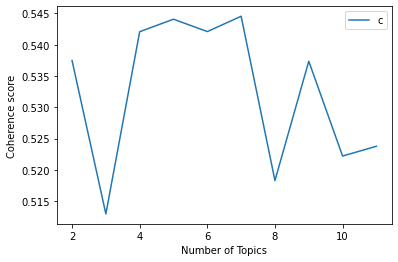

In [93]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [92]:
# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","/content/sample_data/sample1_exercise.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 101
[(0, '-0.708*"data" + -0.662*"analysi" + -0.098*"qualit" + -0.083*"method" + -0.062*"use" + -0.061*"statist" + -0.055*"multivari" + -0.055*"introduct" + -0.051*"longitudin" + -0.050*"model"'), (1, '0.487*"multivari" + 0.323*"design" + 0.305*"experiment" + -0.302*"model" + 0.302*"practic" + 0.293*"introduct" + -0.260*"use" + -0.259*"method" + -0.197*"hierarch" + -0.145*"linear"'), (2, '-0.549*"qualit" + 0.546*"method" + 0.328*"statist" + -0.240*"use" + -0.185*"nvivo" + -0.164*"process" + 0.148*"spatial" + -0.146*"deal" + 0.098*"applic" + 0.087*"linear"'), (3, '0.448*"model" + -0.354*"qualit" + 0.345*"use" + 0.267*"hierarch" + -0.266*"statist" + 0.234*"multivari" + -0.195*"research" + -0.190*"method" + 0.175*"longitudin" + 0.171*"multilevel"'), (4, '-0.407*"longitudin" + 0.349*"qualit" + -0.345*"discret" + 0.312*"method" + 0.193*"multivari" + -0.181*"continu" + -0.181*"outcom" + 0.179*"hierarch" + -0.176*"invers" + 0.173*"introduct"'), (5, '0.431*"use" + -0

In [130]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.709*"data" + 0.663*"analysi" + 0.098*"qualit" + 0.084*"method" + 0.062*"use" + 0.061*"statist" + 0.055*"introduct" + 0.054*"multivari" + 0.051*"longitudin" + 0.050*"model"'), (1, '0.581*"method" + -0.532*"qualit" + 0.328*"statist" + -0.186*"use" + -0.173*"nvivo" + -0.152*"process" + 0.137*"spatial" + -0.134*"deal" + 0.132*"model" + 0.120*"hierarch"'), (2, '-0.496*"model" + -0.455*"use" + -0.316*"hierarch" + 0.280*"multivari" + 0.222*"introduct" + 0.217*"practic" + -0.213*"linear" + -0.179*"multilevel" + -0.179*"regress" + -0.147*"longitudin"'), (3, '0.516*"qualit" + 0.398*"method" + -0.350*"multivari" + 0.269*"research" + 0.253*"statist" + -0.228*"longitudin" + -0.212*"practic" + -0.167*"model" + -0.165*"introduct" + 0.135*"nvivo"'), (4, '-0.402*"multivari" + 0.393*"longitudin" + 0.363*"discret" + -0.319*"introduct" + -0.263*"practic" + 0.183*"outcom" + 0.183*"continu" + -0.182*"use" + 0.173*"invers" + -0.172*"hierarch"'), (5, '-0.427*"use" + 0.297*"model" + 0.268*"qualit" + -0

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
"""Topic Modelling can be evaluated by the concept of Topic Coherence, as topic models gives no guaranty on the interpretability
of their output.Topic modelling provides us with methods to organize, understand and summarize large collections of textual information. 
There are many techniques that are used to obtain topic models. 

Two among them are Latent Semantic Analysis(LSA) and Latent Dirichlet Allocation (LDA) .

For LDA:

LDA is a widely used topic modeling technique to extract topic from the textual data.
Topic models learn topics—typically represented as sets of important words—automatically from unlabelled documents in an unsupervised way. 
This is an attractive method to bring structure to otherwise unstructured text data, but Topics are not guaranteed to be well interpretable, therefore, coherence measures have been proposed to distinguish between good and bad topics.
We created dictionary and corpus required for Topic Modeling: The two main inputs to the LDA topic model are the dictionary and the corpus. Gensim creates a unique id for each word in the document.
In addition to the corpus and dictionary, we need to provide the number of topics as well.
LDA is an unsupervised technique, meaning that we don’t know prior to running the model how many topics exits in our corpus.We can use LDA visualization tool pyLDAvis, by trying a few numbers of topics and comparing the results.
Topic coherence is one of the main techniques used to estimate the number of topics.
We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics.

The  plot of coherence value Vs number of topics shows that coherence score decreases with the number of topics, with a decline between 15 to 20.Now, choosing the number of topics still depends on our requirement because topic around 10 have good coherence scores but may have repeated keywords in the topic.
and also coherence value observed for the data using LDA algorithm is 0.76

For LSA:

LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index). LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document).
LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.
The best way to determine k (number of topics) in topic modeling, is by using Topic coherence measure which is a realistic measure for identifying the number of topics.
It uses the latent variable models. Each generated topic has a list of words. In topic coherence measure, we will find average/median of pairwise word similarity scores of the words in a topic. The high value of topic coherence score model will be considered as a good topic model.

The  plot of coherence value Vs number of topics shows that coherence score decreases with the number of topics. Of the number of topics, 7 have the highest coherence score, so the optimum number of topics are 7.
and also coherence value observed for the data using LDA algorithm is 0.54

So from the above analysis ,i could say that for the data i have taken LDA(Latent Dirichlet Allocation)gives better results with a optimum topic of 10 and coherence of 0.74